<a href="https://colab.research.google.com/github/sridevibonthu/EVA/blob/master/S12/S12_Assignment_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Images and annotations from git

In [1]:
!git clone https://github.com/sridevibonthu/EVALibrary.git

Cloning into 'EVALibrary'...
remote: Enumerating objects: 160, done.
remote: Total 160 (delta 0), reused 0 (delta 0), pack-reused 160
Receiving objects: 100% (160/160), 2.39 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (35/35), done.


## Importing Libraries

In [0]:
import json  
import pandas as pd  
import math
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Load Annotations from JSON file

In [0]:
with open('Dogannotations.json') as f:
  data = json.load(f)

## Sample Labelled Annotated Record with Description

```
 "Dog-13.jpg63606": {                  #Key of the Entry
    "filename": "Dog-13.jpg",          #Name of the Image File
    "size": 63606,                     #Image size in bytes
    "regions": [                       #List of dictionaries containing information about selected box (annotated region) and its class name
      {
        "shape_attributes": {
          "name": "rect",              # Shape of the box
          "x": 140,                    # Starting x-coordinate
          "y": 48,                     # Starting y-coordinate
          "width": 336,                # Width in pixels 
          "height": 305                # Height in pixels
        },
        "region_attributes": {
          "class": "dog"               # Class name for the selected region
        }
      }
    ],
    "file_attributes": {               # attributes of file, url if is taken from online. not needed
      "caption": "",
      "public_domain": "no",
      "image_url": ""
    }
  },
```



## Get data for clustering

In [0]:
path = 'EVALibrary/EVA4/Dogs/'
ds = []
for key, valud in data.items():
  img = Image.open(path+data[key]['filename'])
  sublist = list(img.size)
  sublist.append(data[key]['regions'][0]['shape_attributes']['x']/sublist[0])
  sublist.append(data[key]['regions'][0]['shape_attributes']['y']/sublist[1])
  sublist.append(data[key]['regions'][0]['shape_attributes']['width']/sublist[0])
  sublist.append(data[key]['regions'][0]['shape_attributes']['height']/sublist[1])
  ds.append(sublist)

In [15]:
import pandas as pd
df = pd.DataFrame(ds, columns = ['img_width', 'img_height', 'x', 'y', 'width', 'height', ])
print(df.head())

   img_width  img_height         x         y     width    height
0        480         240  0.325000  0.083333  0.358333  0.766667
1        415         217  0.000000  0.050691  0.590361  0.944700
2        552         368  0.248188  0.108696  0.744565  0.869565
3        283         368  0.035336  0.027174  0.943463  0.904891
4        293         368  0.085324  0.108696  0.904437  0.831522


In [0]:
samples = df.values[:,-2:]

## Raw Data Visulaization

Text(0, 0.5, 'Height')

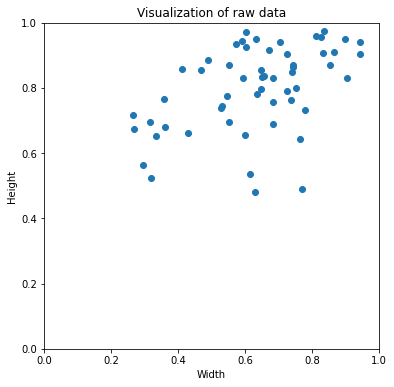

In [17]:
plt.figure(figsize=(6, 6))
#plt.scatter(df.iloc[:, -2], df.iloc[:, -1])
plt.scatter(samples[:,0], samples[:,1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Visualization of raw data')
plt.xlabel('Width')
plt.ylabel('Height')

## Elbow Plot - to find the best number of Clusters

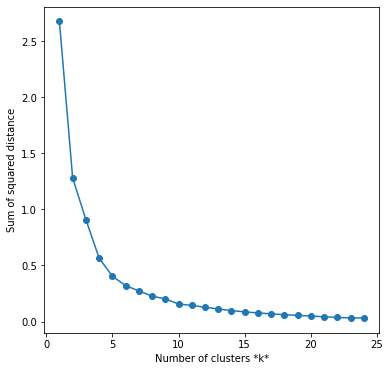

In [18]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 25))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(samples)
    sse.append(km.inertia_)
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## Clustering

In [19]:
nc=3

model = KMeans(n_clusters=nc, max_iter=600)
model.fit(samples)
labels = model.predict(samples)
centroids = model.cluster_centers_
print(labels)

[2 1 0 0 0 0 0 2 0 2 2 2 1 1 1 1 2 1 1 0 1 1 0 0 1 1 2 1 2 1 1 1 2 0 1 0 1
 1 1 2 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1]


Text(0.5, 1.0, 'Visualization of clustered data')

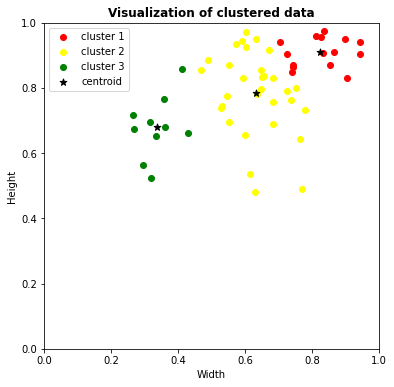

In [20]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['red', 'yellow', 'green', 'blue', 'orange']
for i in range(nc):
  plt.scatter(samples[labels == i, 0], samples[labels == i, 1], c=colors[i], label='cluster '+str(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=50, label='centroid')
plt.legend(loc='best')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Visualization of clustered data', fontweight='bold')
